In [7]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [1]:
x_bounds = np.array([0, 13])
y_bounds = np.array([0, 16])

x_buffer, y_buffer = 1, 1

x_plot = x_bounds + np.array([x_buffer, -x_buffer])
y_plot = y_bounds + np.array([y_buffer, -y_buffer])

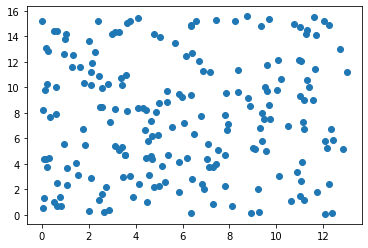

In [8]:
num_points = 200

x = np.random.uniform(*x_bounds, size=num_points).reshape((num_points, 1))
y = np.random.uniform(*y_bounds, size=num_points).reshape((num_points, 1))
pts = np.hstack([x, y])
plt.scatter(*pts.transpose())

In [9]:
vor = Voronoi(pts)
verts = vor.vertices
shapes_ind = vor.regions

In [10]:
# this is a list of all the points that are the verticies in are diagram
verts[0:5, :]

array([[-3001.87056342,     3.60667177],
       [ -104.18932973,     4.35806137],
       [    8.77196056,    14.98751676],
       [    8.22519866,    13.29397244],
       [    8.17197989,    13.36736475]])

In [11]:
# Gives us the indicies into verts for the 10th polygon
shapes_ind[10]

[61, 57, 56, 59, 58, 60]

In [12]:
# gives us the points in R2 that actually form the 10 th polygon
verts[shapes_ind[10]]

array([[11.43443372, 15.0036389 ],
       [10.98728927, 14.40878403],
       [11.51492632, 14.3045376 ],
       [11.83401692, 14.59572417],
       [11.75660168, 14.77269797],
       [11.56371882, 14.9671772 ]])

In [13]:
"""
We are doing three things here
1. filtering out any empty shapes (len(s) == 0)
2. filtering out any shapes that go out of bounds (then it has an index of -1)
3. Closing the polygon by adding the last point back (so [1,2,3]->[1,2,3,1])
"""
shapes_ind = [s+s[0:1] for s in shapes_ind if len(s)>0 and -1 not in s]
shapes = [verts[s] for s in shapes_ind]

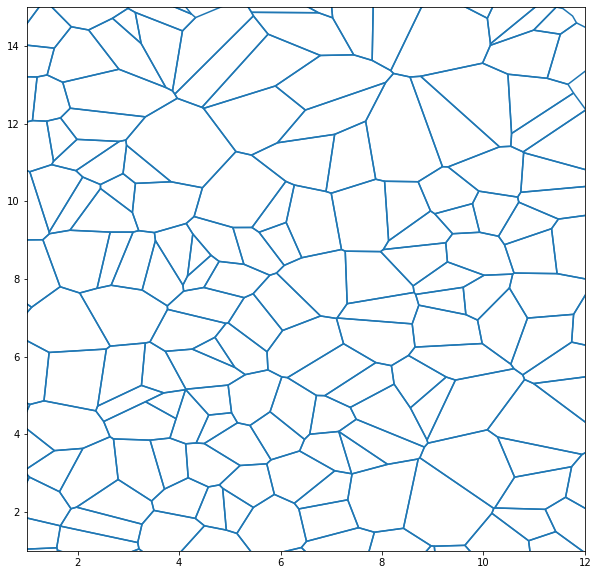

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(*x_plot)
ax.set_ylim(*y_plot)
lc = LineCollection(shapes)
ax.add_collection(lc)

In [30]:
# let's just look at one polygon

polygon_ind = 6
polygon = shapes[polygon_ind]

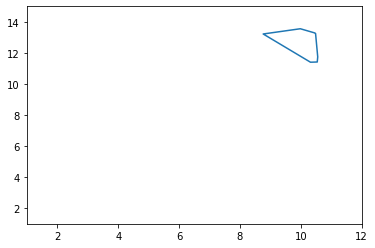

In [31]:
fig, ax = plt.subplots()
ax.set_xlim(*x_plot)
ax.set_ylim(*y_plot)
lc = LineCollection([polygon])
ax.add_collection(lc)

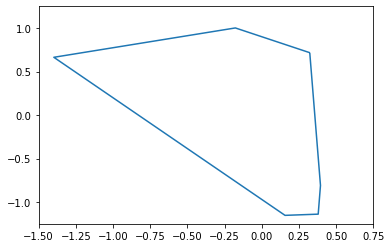

In [37]:
# now we can recenter it
center = np.mean(polygon, axis=0)


fig, ax = plt.subplots()
ax.set_xlim(-1.5, 0.75)
ax.set_ylim(-1.25, 1.25)
lc = LineCollection([polygon - center])
ax.add_collection(lc)

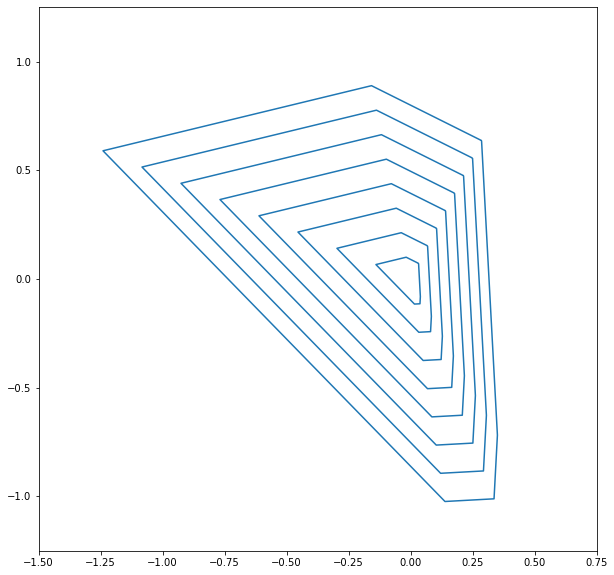

In [45]:
# now we can fill contract it

rescaled = []

n_fill_lines = 8
min_scalar = 0.1

for scaler in np.linspace(min_scalar, 1, num=n_fill_lines, endpoint=False):
    scaled = scaler*(polygon - center)
    rescaled.append(scaled)
    
    
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(-1.5, 0.75)
ax.set_ylim(-1.25, 1.25)
lc = LineCollection(rescaled)
ax.add_collection(lc)

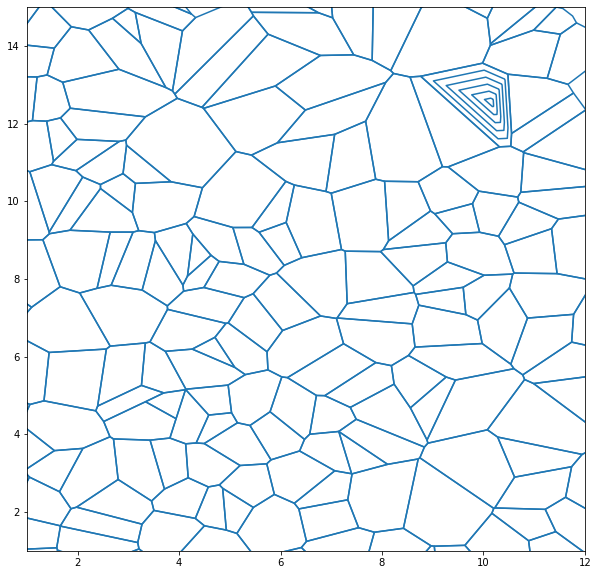

In [46]:

"""
So now we have the fill figured out, and we have to put it back into place!
"""

filled_polygon = shapes

n_fill_lines = 5
min_scalar = 0.1

for scaler in np.linspace(min_scalar, 1, num=n_fill_lines, endpoint=False):
    scaled = scaler*(polygon - center) + center
    filled_polygon.append(scaled)
    
    
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(*x_plot)
ax.set_ylim(*y_plot)
lc = LineCollection(filled_polygon)
ax.add_collection(lc)